# Overview of the Python scripts and libraries

## Downloading the text
There are two download scripts for downloading the text, one for each of the two major online archives of talks, scriptures.byu.edu and churchofjesuschrist.org (formerly lds.org). The scripts are
* **download_lds_org.py**
* **download_byu_edu.py**

The first one is fairly straightforward to use. The byu.edu downloader is trickier because that site makes heavy use of JavaScript to render pages, so simply downloading the HTML of a page will not necessarily include the text of interest. It makes use of a library that connects with an external browser to render the pages. It has been run successfully on MacOS, but I have struggled to get it to work on Windows.

The download scripts extract the text of the talk along with citations and author metadata into local JSON files.

There is also a third script (still a work in progress) for downloading text versions of the scans hosted at archive.org for older talks.

## Loading the data_utils library and the data
**data_utils.py** contains a number of utility functions for loading and processing the data. The **load_data()** function loads all of the JSON files, with various options to select which ones to load. It will also create a local .pkl file of the results for faster loading on subsequent calls. It returns the data in a single large **pandas** dataframe containing various columns with title and author data as well as the full text of the talk. It also includes assorted bits of text that are not considered actual addresses. These can be filtered out using the **get_only_talks()** function, as shown below.

In [1]:
# Import libraries and setup matplotlib defaults
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
pl.style.use('fivethirtyeight')
pl.rcParams.update({
    'lines.linewidth': 2,
    'font.size': 20,
    'figure.figsize': [12, 8],
    'figure.subplot.left': 0.125,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.15})

# Import everything from the data_utils library
from data_utils import *

# Load the talk data
talk_data = get_only_talks(load_data())

loading conferece_data.pkl


## Searching the text
The main function for searching the text is the **text_search()** function, which takes as arguments the dataframe containing all of the talk data, and a Python dict containing search data. The dict structure is used because it makes it easy to customize the precise parameters of the search, and to store that search data in a JSON file, for example.

The results of the search are returned in a **pandas** dataframe that makes it easy to create tables and plots.

### Example
For an example, we will look at uses of the term "plan of salvation" and "plan of happiness" over time. The third parameter of the text_search() function is the time over which to aggregate results. Options are "date" for each general conference, "year" for a year (2 conferences), or "decade". The first example starts with the "conf" option.

running search: [{'include': 'plan of salvation'}, {'include': 'plan of happiness'}]


Text(0.5, 1.0, 'Search results')

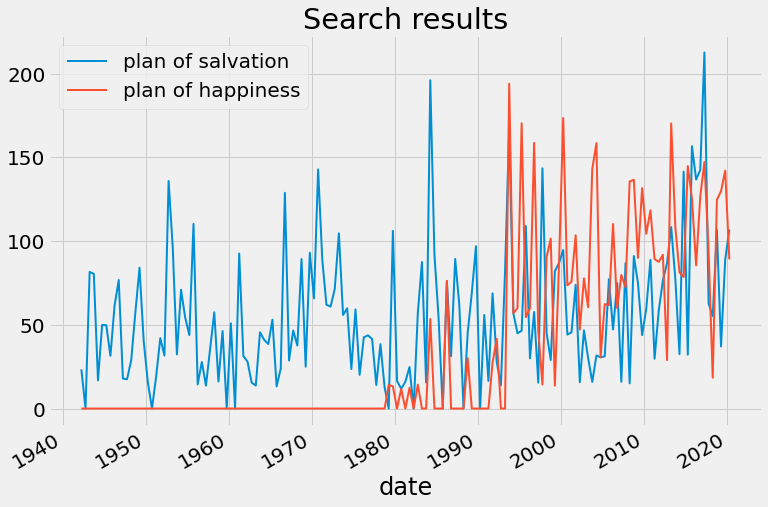

In [2]:
searchdata = {'search': [{"include": "plan of salvation"},
                         {"include": "plan of happiness"}]
             }
results = text_search(talk_data, searchdata, 'date')
ax = results.plot()
ax.set_title('Search results')

Aggregating results by individual general conferences generally yeilds fairly noisy results, with the possible exception of the most commonly used words. It is generally easier to see trends by either smoothing them, or aggregating over longer periods.

running search: [{'include': 'plan of salvation'}, {'include': 'plan of happiness'}]
running search: [{'include': 'plan of salvation'}, {'include': 'plan of happiness'}]


Text(0.5, 1.0, 'Search data, aggregated by decade')

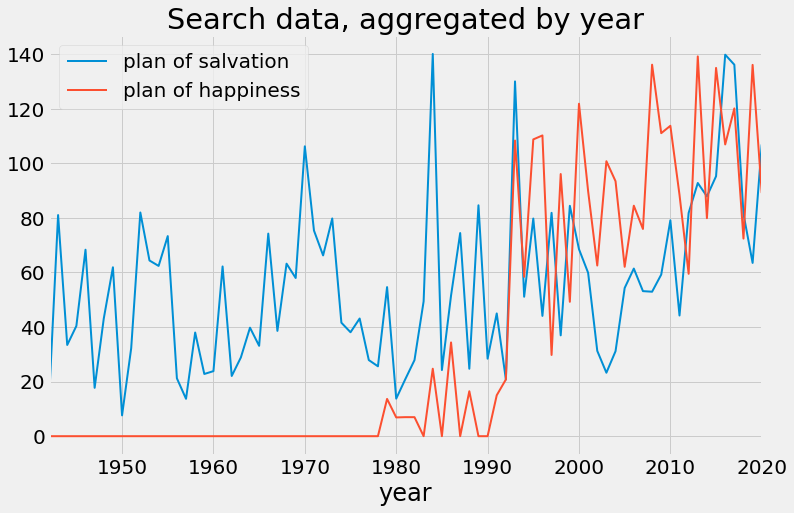

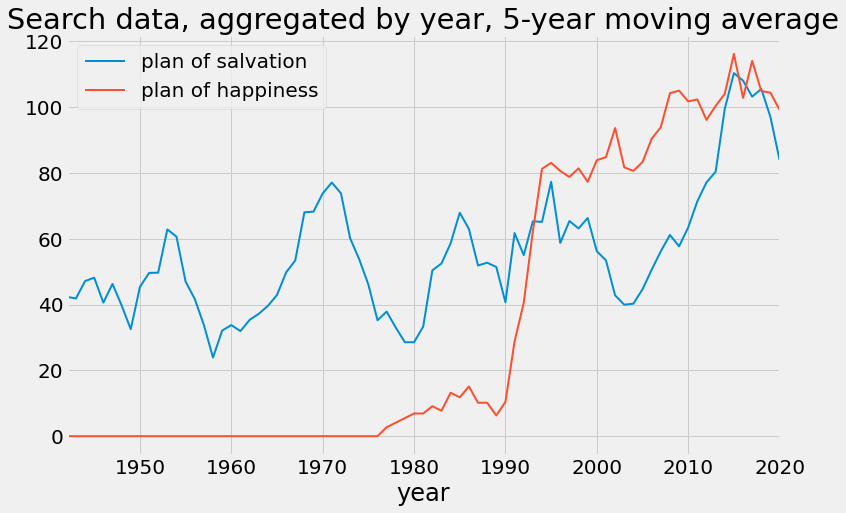

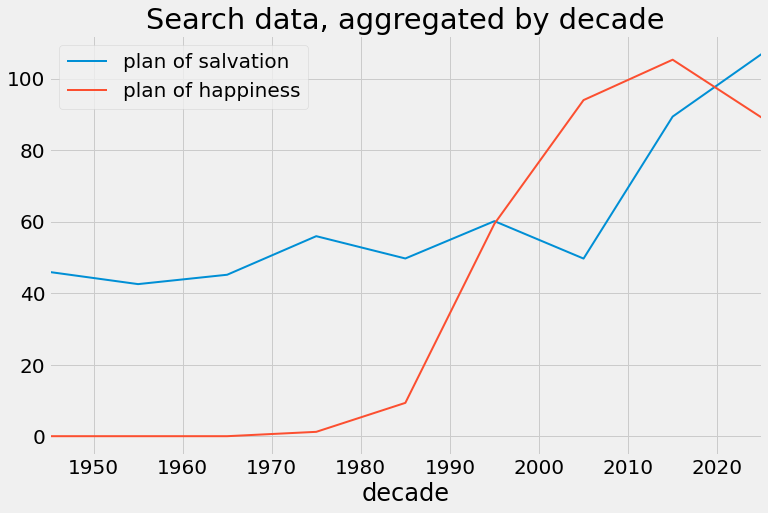

In [3]:
results = text_search(talk_data, searchdata, 'year')
ax1 = results.plot()
ax1.set_title('Search data, aggregated by year')

ax2 = results.rolling(5, min_periods=1, center=True).mean().plot()
ax2.set_title('Search data, aggregated by year, 5-year moving average')

results = text_search(talk_data, searchdata, 'decade')
ax3 = results.plot()
ax3.set_title('Search data, aggregated by decade')

## Other utility functions
Given the results shown in the plots, we may wish to see whether a particular individual was responsible for a trend in word usage. The **top_users()** function takes as inputs the dataframe with the talk data, and a search string, and returns a dataframe containing the top 10 users of that phrase.

In [4]:
top_users(talk_data, 'plan of happiness')

,matches,fraction
author,,
Richard G. Scott,53,0.146006
Boyd K. Packer,31,0.085399
Russell M. Nelson,25,0.068871
Dallin H. Oaks,19,0.052342
David A. Bednar,14,0.038567
Dieter F. Uchtdorf,14,0.038567
M. Russell Ballard,13,0.035813
Henry B. Eyring,12,0.033058
Quentin L. Cook,11,0.030303


Similar to the **top_users()** function, the **first_users()** function makes it possible to discover who used a phrase first

In [5]:
first_users(talk_data, 'plan of happiness')

,matches,author
date,,
April 1979,1,Marion D. Hanks
October 1979,1,Spencer W. Kimball
October 1980,1,Neal A. Maxwell
October 1981,1,Richard G. Scott
October 1982,1,Neal A. Maxwell
April 1984,3,Neal A. Maxwell
April 1986,1,Richard G. Scott
April 1986,3,"Jack H. Goaslind, Jr."
October 1988,2,Boyd K. Packer


## Other search parameters
Some searches may want to include some strings and exclude others. An "exclude" string can be included in search strings. In addition, a "label" string can be used to define the label associated with the search string in the results, in the event that something different than the plain text string is desired. The following is an example:

running search: [{'label': '"free agency"', 'include': 'free agency'}, {'label': '"moral agency"', 'include': 'moral agency'}, {'label': 'other usages of "agency"', 'include': 'agency', 'exclude': ['free agency', 'moral agency']}]


Text(0.5, 1.0, 'Evolving use of "agency"')

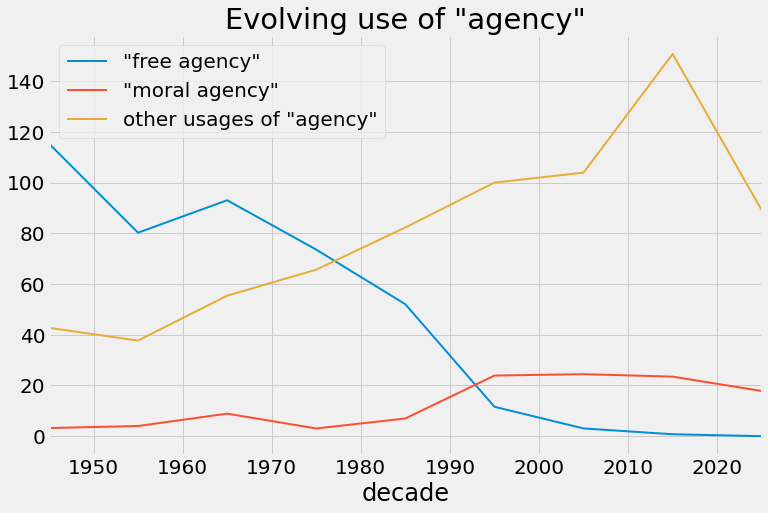

In [6]:
search_data = {"search": [{"label": "\"free agency\"",
                          "include": "free agency"},
                         {"label": "\"moral agency\"",
                          "include": "moral agency"},
                         {"label": "other usages of \"agency\"",
                          "include": "agency",
                          "exclude": ["free agency", "moral agency"]}]}
results = text_search(talk_data, search_data, 'decade')
ax = results.plot()
ax.set_title('Evolving use of "agency"')